In [1]:
#Universidad del Valle de Guatemala
#Fernando Garavito 
#Jose Ponce
#Gabriel Quiroz

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn import metrics

In [13]:
img_path = 'Desktop/Lab 6/malimg_paper_dataset_imgs'

In [17]:

AAA = ImageDataGenerator().flow_from_directory(directory=img_path, target_size=(64,64), batch_size=100000)


AAA.class_indices

Found 9339 images belonging to 25 classes.


{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [18]:


imgs, labels = next(AAA)



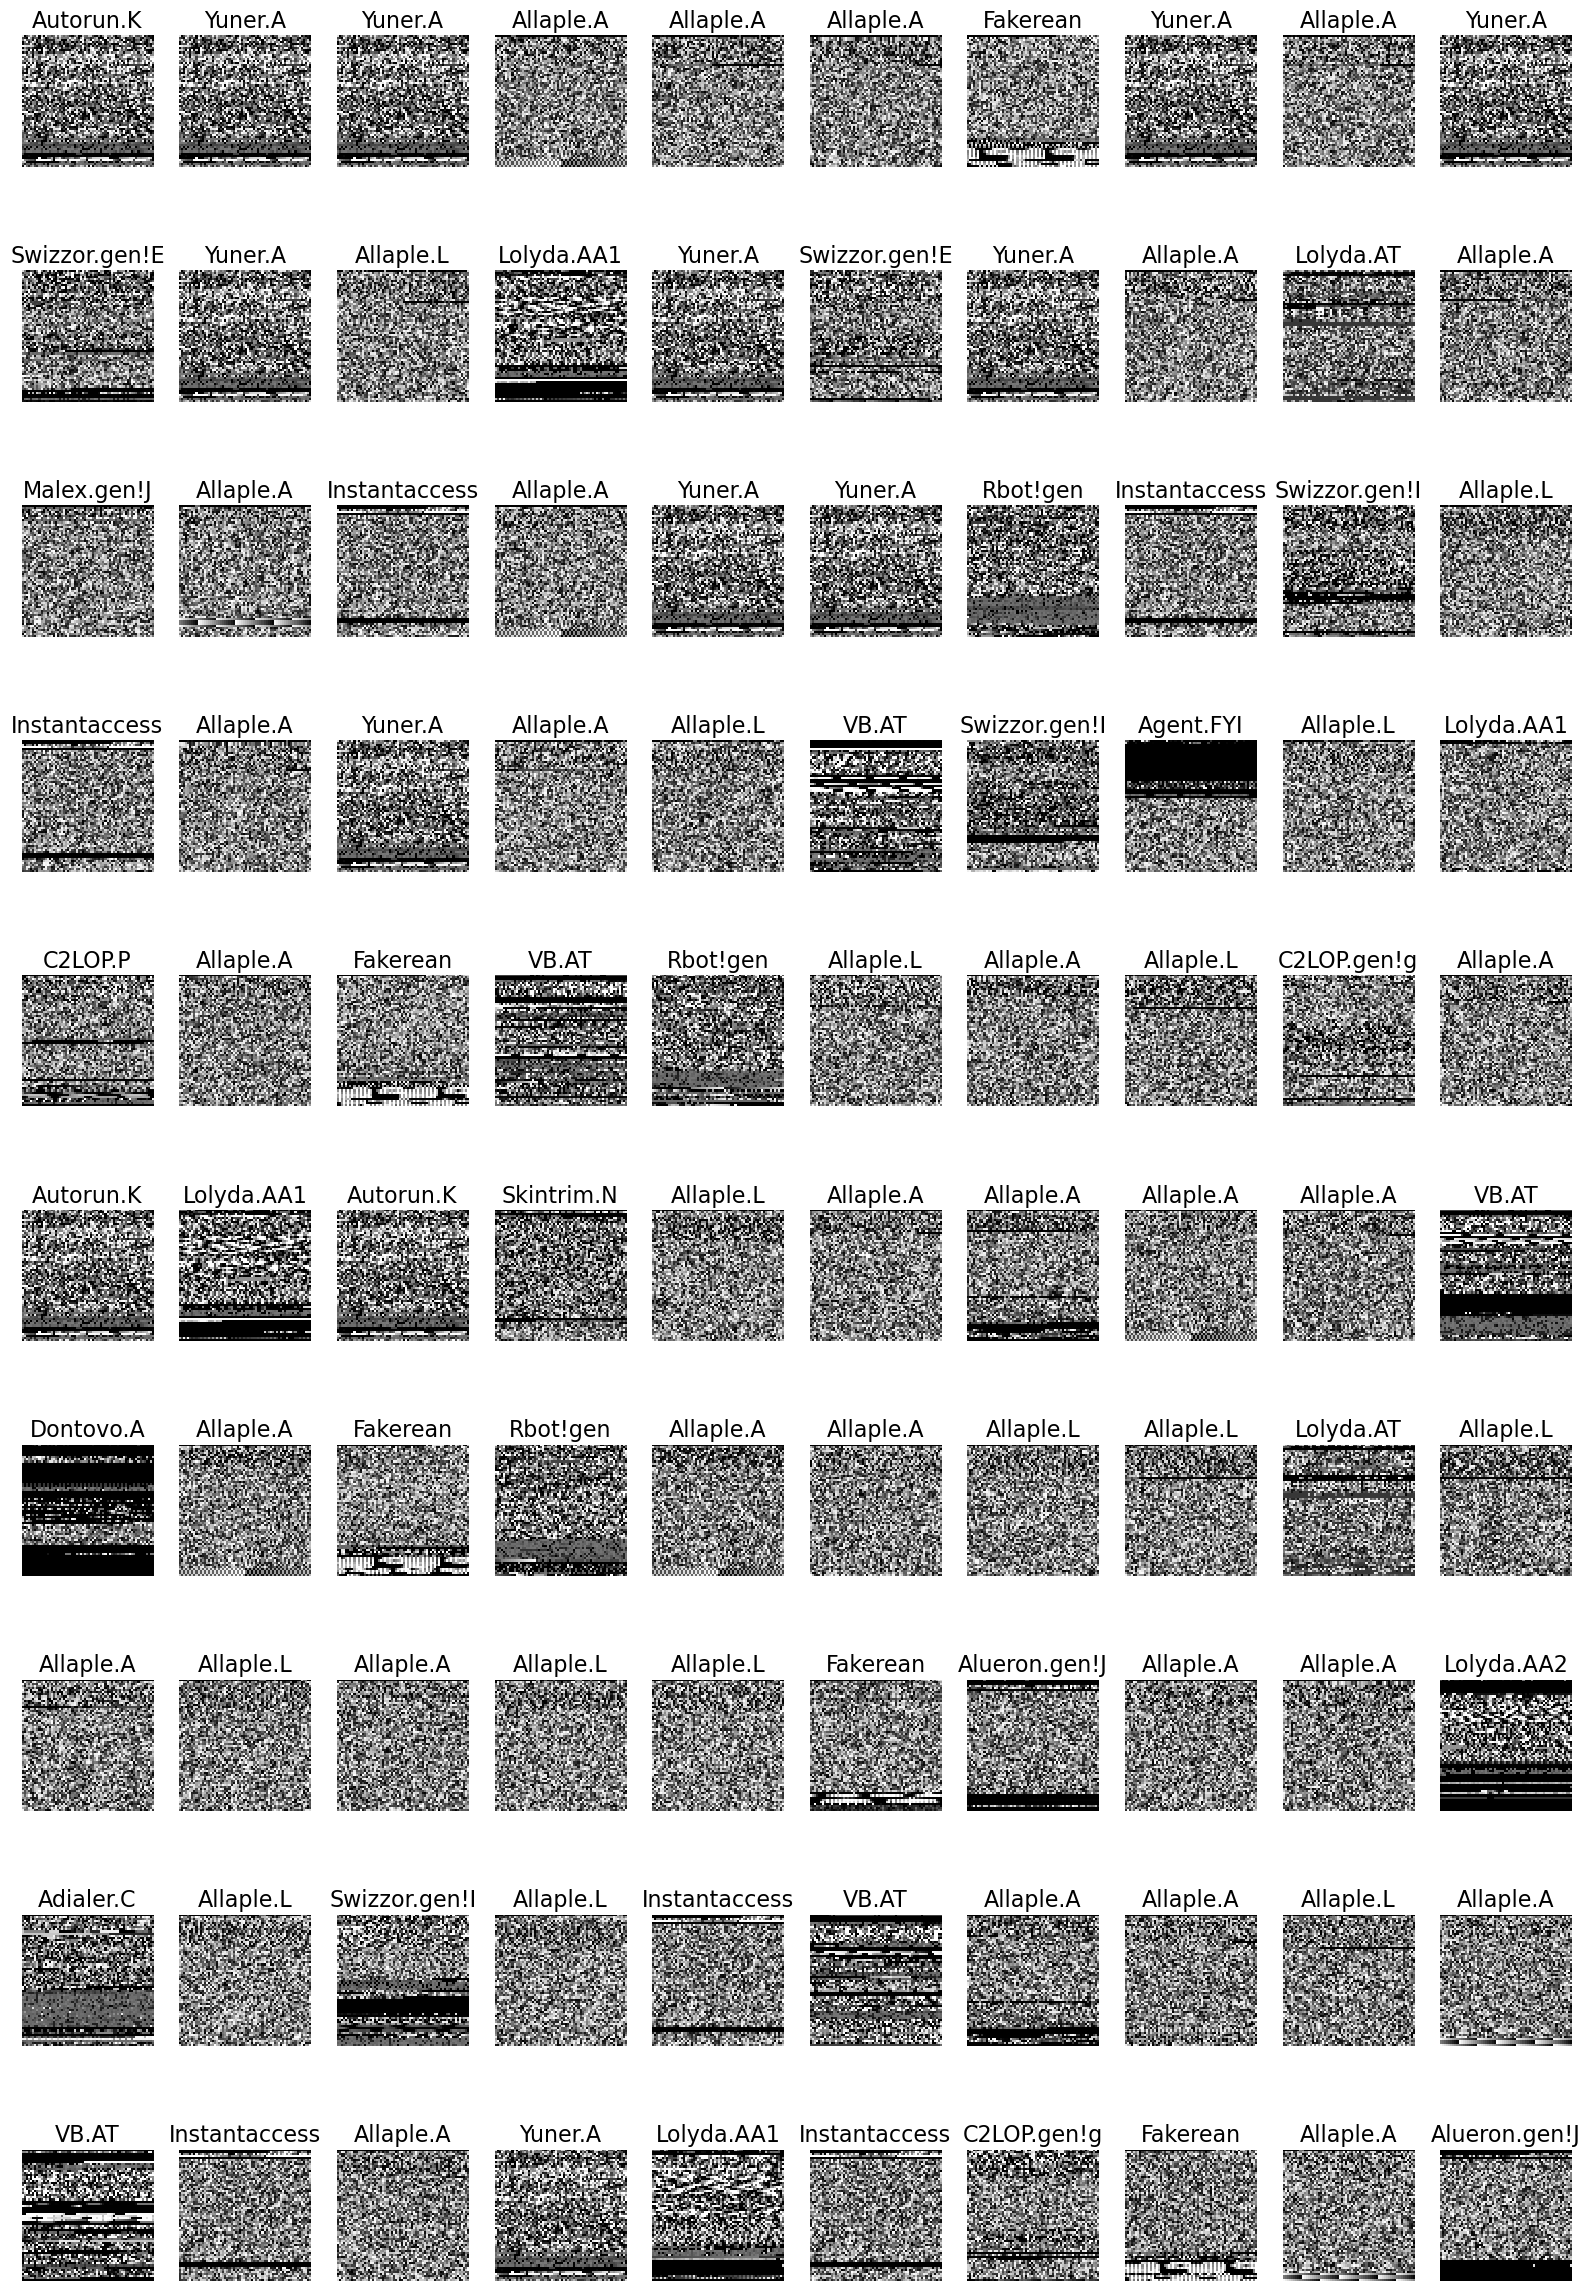

In [27]:
Sizes=(30,30)
Rows=10
I=False

if type(imgs[0]) is np.ndarray:
    imgs = np.array(imgs).astype(np.uint8)
    if (imgs.shape[-1] != 3):
        imgs = imgs.transpose((0,2,3,1))

A = plt.figure(figsize=figsize)
C = 10

for i in range(0,100):
    sp = A.add_subplot(rows, C, i+1)
    sp.axis('Off')
    if labels is not None:
        sp.set_title(list(AAA.class_indices.keys())[np.argmax(labels[i])], fontsize=16)
    plt.imshow(imgs[i], interpolation=None if I else 'none')